## Notebook to examine the affect of aperture size on transport probability
- One would expect that smaller apertures lead to lower escape rates, which in turn yields higher collision rates and greater transport likelihood.

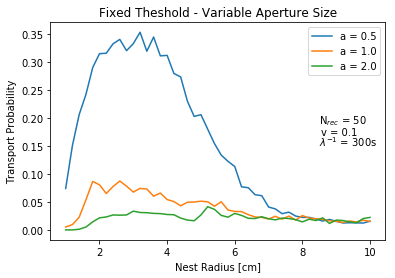

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get df for aperture of 0.5cm and v = .1 called dataframe 1
dataframe1 = pd.read_csv('RESULTS/dataframe1.txt',sep='\t',names=['a','R','lambda','n_rec','ant_name','t_exit','t_entry','n_col'],index_col=False)

# Get df for aperture of 1cm  and v = .1 (called dataframe 7)
dataframe2 = pd.read_csv('RESULTS/dataframe7.txt',sep='\t',names=['a','R','lambda','n_rec','ant_name','t_exit','t_entry','n_col'],index_col=False)

# Get df for aperture of 2cm  and v = .1(called dataframe 8)
dataframe3 = pd.read_csv('RESULTS/dataframe8.txt',sep='\t',names=['a','R','lambda','n_rec','ant_name','t_exit','t_entry','n_col'],index_col=False)

#e_crit = np.arange(0.0,0.05,0.01)
e_crit = [0.01]
R_array = np.unique(dataframe1['R'])

for e in e_crit:
    p_transport1 = []
    p_transport2 = []
    p_transport3 = []
    for R in R_array:
        
        # First plot transport probability for a = 0.5
        df1 = dataframe1[dataframe1['R']==R]
        t_inside1 = df1['t_exit']-df1['t_entry']
        enc_rate1 = df1['n_col']/t_inside1 
        counter = 0
        for each in enc_rate1:
            if each > e:
                counter = counter + 1.
        p_transport1.append(counter/np.size(enc_rate1))
        
        # Next plot transport probability for a = 1
        df2 = dataframe2[dataframe2['R']==R]
        t_inside2 = df2['t_exit']-df2['t_entry']
        enc_rate2 = df2['n_col']/t_inside2
        counter = 0
        for each in enc_rate2:
            if each > e:
                counter = counter + 1.
        p_transport2.append(counter/np.size(enc_rate2))
        
        # Next plot transport probability for a = 2
        df3 = dataframe3[dataframe3['R']==R]
        t_inside3 = df3['t_exit']-df3['t_entry']
        enc_rate3 = df3['n_col']/t_inside3
#         print np.size(enc_rate3)
        counter = 0
        for each in enc_rate3:
            if each > e:
                counter = counter + 1.
        p_transport3.append(counter/np.size(enc_rate3))
    plt.plot(R_array,p_transport1,label='a = 0.5')
    plt.plot(R_array,p_transport2,label='a = 1.0')
    plt.plot(R_array,p_transport3,label='a = 2.0')


plt.title('Fixed Theshold - Variable Aperture Size')
plt.xlabel('Nest Radius [cm]')
plt.ylabel('Transport Probability')
# plt.annotate(r'$N_{rec}$ = 50',(8.0,0.9))
# plt.annotate('a = 0.5cm',(8.,0.85))
plt.annotate('v = 0.1',(8.55,0.17))
plt.annotate(r'N$_{rec}$ = 50',(8.5,0.19))
plt.annotate(r'$\lambda^{-1}$ = 300s',(8.5,0.15))
#plt.annotate(r'q$_{c}$ = 0.00',(8.,0.8))
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/variable_apertures.pdf')
plt.show()

## Smaller aperture preferred